# SRO internship during Winter 2020 : a programming how-to guide
Made by Nikita Allaglo, 2020-04-25.


## General information
--- 
This jupyter notebook will introduce a beginner, like I was at the beginning of my internship to some basic stuff mandatory to quickly face calculations within abinit. A true beginner will have to face a whole new conceptual world including new physical concepts, and finding the pertinent information for mandatory elements such as programming must be found quickly. Due to the variety of possibilities, it can be easy to quickly be surrounded by a ton of information. This notebook will therefore provide a quick how-to guide summarizing the most important aspects in addition of useful references. As a matter of fact, at first, I will introduce basic knowledge about *Bash* scripting. This will be helpful to introduce you to navigate in supercomputers. Speaking of supercomputers, I will explain to you an easy tutorial on how to set up a connetion with a supercomputer on Windows (it is quite easy on Linux or Mac). Secondly, I will show how to use the codes I wrote to help you treat some abinit calculations. 


## *Bash* scripting and how to use a supercomputer
---
*Bash* is mandatory if you are about to navigate throughout a supercomputer. I won't pretend to learn you everything here. If you want to go from beginner to amateur, you should follow [this](https://ryanstutorials.net/linuxtutorial/). But first, if you are like me at the beginning of my internship; I guess you have no idea how to connect to a supercomputer - that is the MUST for the type of computations during the internship -. I won't get too much into the details but it can be kind of annoying at start, so I hope this will help (if you want a full description : [computecanada](https://docs.computecanada.ca/wiki/Getting_started/fr) gives a total introduction to the subject). You should at first [set up](https://ccdb.computecanada.ca/account_application) an account. You will have to add Mr.Tremblay's account number : **esc-193-01**. 

### First connetion with a supercomputer
Most guides will propose applications like *Mobaxterm* to have a remote connetion on a computer, but I personaly was not really fond of Moba because I found it kind of slow and if you are used to a particular IDE; it will feel like a downgrade. What I used was *Pycharm Professional edition* that is free if you are a student affiliated to an institution. You can set up an account by following the instructions given [here](https://www.jetbrains.com/shop/eform/students). 
To set up the connection with a supercomputer, open pycharm (after you have set up your python environnement) and do the following : 
<ol>
    <li> Click on 'Tools'</li>
    <li> Click on 'Deployment'</li>
    <li> Click on 'Configuration'</li>
    <li> Choose <b>SFTP</b> type </li>
    <li> Find your supercomputer hostname at the Ressources section in the computecanada link I provided above </li>
    <li> add your username and password
</ol>
You are done ! Pycharm has a lot of functionalities with SSH such as syncing files on your machine and the remote machine, use your IDE to code stuff; or even access the supercomputer with a friendly interface (and not based on terminal navigation). The problem of pycharm's ssh is the fact that there is no X11 forwarding : in other words, you won't be able to directly receive graphical information from the remote computer's terminal. This was not really a problem during my internship because the main graphical elements I had to see were python's static plots and I could always save the figure. If it is mandatory for you to have an interactive graphical forwarding, you can still use <i>Mobaxterm</i> just for these cases. 

You can start an interactive terminal with your remote machine by clicking <code> Tools >> Start SSH session </code>. A terminal will therefore pop-up. Now let's talk about navigating in the supercomputer.

### Navigate in the supercomputer

Let's suppose you are on Béluga supercomputer. Type the following : 

<code> >> cd ~/projects/def-tremblay/SHARED/nikita69 </code>

You are now in a shared directory I created in Mr.Tremblay's group directory as you can check with the command <code> >> pwd </code>. Try to copy the <code> ham </code> directory it in your home directory : 

<code> >> cp -r ham ~/ </code>

Go back to your home directory by typing <code> >> cd ~/ </code>. You can check that the file has indeed been copied by typing <code> >> ls </code>. There are a LOT of bash commands, but what I've shown you here are the main commands you will need to handle navigating through the supercomputer ! Note that everything here is doable with Pycharm's friendly interface : if you click <code> Tools >> Deployment >> Browse Remote Host >> your_supercomputer </code>. This interface obviously reminds you of Windows if you are a Windows user but once you master console navigation, you will find it much faster and more ergonomic. 

Very useful tips : TAB enables you to complete your console command, and up-arrow/down-arrow enables you to get through your past console commands. File writing can be treated with either Pycharm's IDE after you have created a file (with <code> >> touch file </code> for instance) or directly through the terminal with <code> >> nano </code>, or <code> >> vi(m) </code>. File reading on the other hand can be treated with Pycharm or <code> >> cat file </code> or <code> >> less file </code>. One important thing to record : sometimes when writing files with your IDE, UNIX won't be able to read/execute them; the solution is to type <code> >> dos2unix file </code>. Another tip that could be useful when dealing with abinit calculations that have crashed : you can type <code> >> tail file </code> where <code> file </code> can be the error file, log file our even the .out file. You will immediately be able to see why your calculation has crashed. Now that you have the basis to navigate in the supercomputer, you can ask yourself : 
>But how do I use python on this remote machine ?

### Modules and python environment

To use some specific modules on the supercomputer, you have to use the command <code> module </code>. General information about modules can be found [here](https://docs.computecanada.ca/wiki/Utiliser_des_modules). The main modules I had to use during this internship were : *abinit* and *python*. To check available versions of python for instance, type : 

<code> >> module spider python </code>

I can already see you asking this question, if you were used to friendly interfaces package managers such as *conda* : 
> Okay, that's cool, but what about numpy, scipy, etc. I can just write import numpy in a .py file, and everything will be set up ?

Well, I guess working remotely on a machine requires you to create a **virtual environment** that will be helpful to manage modules working on a specific project. To set up a virtual environment, follow these steps : 
<ol>
    <li> <code> >> module load python/x </code> : load python with version x </li>
    <li> <code> >> virtualenv path/to/venv </code> : create the virtual environment </li>
    <li> <code> >> source path/to/venv </code> : activate the venv </li>
    <li> <code> >> pip install ... </code> : install various packages </li>
    <li> <code> >> deactivate </code> : exit the venv </li>
</ol>
Your virtual environment is created ! Everytime you login on your remote machine, you just have to load the selected version of python and source your venv. If you have a list.txt file containing a list of packages, you can use : <code> >> pip install -r list.txt </code>. Since anaconda is not available in compute canada's systems; there are some premade packages that will fit most of your scientific calculations. You can indeed use <code> module load scipy-stack </code>. 

Much more information is provided by [computecanda](https://docs.computecanada.ca/wiki/Python).



### *Bash* scripting and submitting jobs

Now that you have all the elements to prepare calculations, executing them should now be our primary focus. The best way to learn *Bash* scripting is, according to me, to provide some examples. Before getting into bash scripting, we should take a look at jobs submission on computecanada's systems. Do not try to execute the following bash scripts, they are only visual.

In [1]:
#!/bin/bash
#SBATCH --account=rrg-tremblay-ac
#SBATCH --ntasks=913           
#SBATCH --mem-per-cpu=10G         
#SBATCH --time=48:00:00           
#SBATCH --mail-user=<nikita.allaglo@usherbrooke.ca>
#SBATCH --mail-type=ALL
#SBATCH --output="ham_py_soc%j.out"

module purge

source /home/nikita69/projects/def-tremblay/SHARED/abinit/module_abinit-9.0.2_gnu

srun abinit < dmft_sro.files > log 2 > err

SyntaxError: invalid syntax (<ipython-input-1-1d6006f03dfb>, line 10)

<a id='submit'></a>
The code above shows you how to submit an abinit job on 913 processors, with 10 G of memory per cpu and running for a maximum time of 2 days. <code> --mail-user=... </code> and <code> --mail-type=ALL </code> enable the system to send you an email as soon as the status of your job has changed. The command <code> srun </code> enable you to run in parallel an executable. To execute a .py, you can just type <code> python file.py </code> after being sure you loaded a version of python and - if necessary - loaded a virtual environment. After your job submission file has been written, you can just type : 

<code> >> sbatch file.sh </code>

I always recommend you to end your submission files by .sh, because if you have many submission files in a overloaded directory, you can list all of them with <code> >> ls *.sh </code>. Sometimes, it is not really necessary to create a job submission file : for instance, to run short python tasks or many test jobs that need some interaction with the console. <b>DO NOT RUN THOSE JOBS ON THE LOGIN NODES</b>. In these cases, you should use the following command : 

<code> >> salloc --ntasks=1 --account=... --time=... --mem=... </code>

You will therefore be able to execute tasks interactively in the terminal. You have to recall that modules loading must happen after you have been allocated your request and not before. I list below some important commands related to jobs : 

<ul>
    <li> <code> >> squeue -u username </code> : check the states of your jobs </li>
    <li> <code> >> scancel -u username </code> : cancel all your jobs (RUNNING or PENDING) </li>
    <li> <code> >> scancel -t TYPE -u username </code> : cancel the jobs TYPE </li>
    <li> <code> >> sshare -A account_cpu -l </code> : check the priority of your personal account or affiliated account regarding group members or all users </li>
</ul>

More generally, we can now talk about *Bash* scripting. We will introduce it with a case-study. Imagine you have 200 .py files that are independant and that you have to launch using a submission file. Let's suppose all the submission files are the same and you can generate the 200 .py files with another .py that manages file writing. All the .py files are in a different directory and all these directories are in the same directory. I know everything is easy to make with [job arrays](https://docs.computecanada.ca/wiki/Job_arrays); but I just want to give an example of *Bash* scripting here. The cell below shows how I will handle this situation.


In [47]:
#!/bin/bash

for dir in */
    do
        cp exec.sh ${dir}
        cd ${dir}
        sbatch exec.sh
        echo "Job submitted in" $PWD
        cd ..
    done

SyntaxError: invalid syntax (<ipython-input-47-22bb7b34a47c>, line 3)

The difficulty of *bash* scripts I had to write during my internship was mainly as the code above. Copy a single file in many directories, input something in many different files, executing a lot of jobs, gather information from many directories in a single directory, etc. I think the code above is enough explicit that I do not need to explain how it works. Maybe still one thing : the variable provided by a loop is assigned with <b>$</b> and you have to add "do-done". To execute this script, just type <code> ./script.sh </code> or <code> sh script.sh </code> or even <code> bash script.sh </code>. 

If you have examined further the link I provided, I think that now you have enough background to manage bash and navigating through a supercomputer. This first part here was very general; so it might be a good time to make a transition to specifically abinit and the codes I wrote to help you manage your calculations. Interactive jupyter notebooks were probably not the best format for this first part, but since they are much more useful for the last parts, I prefered to keep this format for the whole how-to guide. 

## Abinit : parallelisation, and how to manage typical calculations.
---
To start with, you can get all my codes on my [gitlab](https://gitlab.com/nikita69/sro_internshipw20/-/tree/master). Their names are already kind of revealing but I guess it is important to make a detour throughout all of them, since they just provide the data and do not plot automatically. Important note : you won't learn here anything about how to make an abinit calculation; I guess [abinit](https://docs.abinit.org/tutorial/) already provides step-by-step tutorials that should wrap the whole thing about convergence studies, relaxation parameters, band-structures, spin-orbit coupling or even projectors calculations. The tutorial about [parallelism](https://docs.abinit.org/tutorial/basepar/) can be found disturbing by a beginner who does not know anything about parallelization. Before seeing how to manage some typical calculations, it can be a good idea to teach how to gain profit from parallelisation within abinit. 

### Parallelisation and abinit

There are mainly two methods to efficiently parallelize an abinit computation : automatic parallelisation or manual. Automatic parallelisation mainly holds on three facts : 
<ol>
    <li> <code> autoparal == 1 </code> variable in your input file. </li>
    <li> you have to check the value of <code> nkpt*nsppol </code> or <code> nkpt*nspinor </code> before launching effectively your calculation. To check these values, you should use the <code> salloc </code> as I mentioned <a href = '#submit'> here</a> to run some short test jobs to just check the number of kpts, the number of spin polarizations or the number of spinors. </li>
    <li> choose a number of processors that divide the product <code> nkpt*nsppol </code> or <code> nkpt*nspinor </code>. This is very important : if you choose a number of processors that does not divide the given products, in version 9.0.2 for instance, sometimes the code won't run. </li>
</ol>
Abinit will therefore automatically parallelize your calculation mainly with respect to kpts, and the spin level. It's possible he may a find a more efficient parallelisation involing bands or FFT; but don't worry, it will automatically select the "best" combination. One important aspect to recall : since values of <code> npfft </code> greather than 1 make threads-like parallelism systems plant a lot (I experienced it a lot ^^); you can always set manually your parallelism variables with <code> paral_kgb == 1</code> and the values of <code> npkpt </code> and <code> npspinor</code> which respect the method above. 
This method is pretty easy but the parallelisation will mainly hold on two aspects (kpts and spins) : it is not really a big deal since in the case of SRO for instance, we use a very fine grid involing a lot of kpts, the parellelisation is thus more important for these levels than the other levels.  For systems not involving much kpts you should use the following method :
<ol>
    <li> parallelize at first all levels except kpts and spins : 
        <ol>
            <li> use the variables <code> paral_kgb == 1 </code> and <code> max_ncpus == ... </code> in your input file (don't forget to only include the $\Gamma$ point) </li>
            <li> abinit will therefore print the best combinations of processors (between 2 and max_ncpus) at each level : select the values of <code>npfft</code> and <code> npband </code> that give the highest weight </li>
        </ol>
    </li>
    <li> add the values of <code>npfft</code> and <code>npband</code> in your input file, and choose values <code> npspinor = nspinor </code> and <code> npkpt </code> dividing <code> nkpt </code>. </li>
</ol>
Since some computations take a long time, you cannot really waste ressources and check if your parallelization is efficient by comparing to the time with 1 processor. Even if the following method is heuristic, it can give you an approximate of the effectiveness of the parallelization. You can type these commands in your console : 

<code> >> seff job_id </code>

or

<code> >> grep Proc abinit.out </code>

The first command will print the CPU efficiency, and the more it's close to 100%, the best your parallelization is. The second command will print the cpu time and wall-clock time used by your whole cores trunk. The CPU time measures the time that your processors load has been computing something (it does not sum up the time of each core); and the wall-clock time is the effective time taken to make your computation (it includes communication between processors, etc.). The more these times are close together, the best your parallelization is. Funny tip : if you type <code> grep -i overall abinit.out </code> you will see the time that your computation would have taken with only one processor (not really actually, but it gives a good approximate; since it's the **sum** of cpu-time of each core). If you make some demanding calculations, this time can sometimes be hilarious ^^. Now that you have enough background to take benefit from the supercomputers and make effective computations, let's see now how to manage some abinit typical calculations. 



### Managing convergence studies, band-structures, fatbands or even relaxations in Abinit

Starting from here, I guess the notebook format will be very helpful. Treating vanilla data from abinit output files is, for a beginner, kind of demanding since you can not just <code> np.genfromtxt(path) </code> as you were probably used during your labs sessions. They actually contain a lot of data that you need to properly structure to gather specific information. 

#### Convergence studies

To study SRO at the beginning of my internship, it was mandatory to find the parameters that could guarantee correct convergence. The main parameters involved in the convergence are <code> nkpt </code>, <code> ecut </code> and <code>pawecutdg</code>. Since abinit's multidatasets functions are pretty limited, it is obviously easier to build the input files with python for instance. And then study the convergence with python as well. Everything is implemented in <code>convergence.py</code>. All the vanilla files are provided in the <code>files</code> directory. I will show here an example on a kpt-convergence study. 

In [18]:
from convergence import Convergence
#help(Convergence)
#Define the grids you want to provide
uniforms = [2,3,4,5,6,8,10,15,20]
ngkpts = [[i,i,i] for i in uniforms]

#Initialize your convergence study and check whether the keywords are already present in your file
study_k = Convergence('files/Convergence/sro_conv.in', {'ngkpt':ngkpts})

#Create your input file : I recommend format multidata; format separated has not been tested when gathering the data from .out files
#I also recommend to make relaxation calculations one by one; since you can get the data from 1 computation to input in another.
#It is however possible to initialize a study with more than 1 parameter.

study_k.make_inputs(format='multidata', write=True)

As you can see in the <code>files/conv</code>, a file has been created with the proper grids. You just have to launch an abinit calculation and you will get the .out file provided in the <code>files/conv/sro_conv.out</code>. Now that the calculation is complete, you can get the data with the study you defined in python. 

In [20]:
etotal = study_k.get_data({'ngkpt':['files/Convergence/sro_conv.out']})
print(etotal)

[[-223.10296729, -223.10499584, -223.12429288, -223.12122461, -223.12220017, -223.12276855, -223.12312407, -223.12307352, -223.12306902]]


Since convergence studies are mainly based on $E_{\mathrm{total}}$; the values are returned. Now you can make a smoothing of the data, and get convergence parameters based on some margin you have to provide.

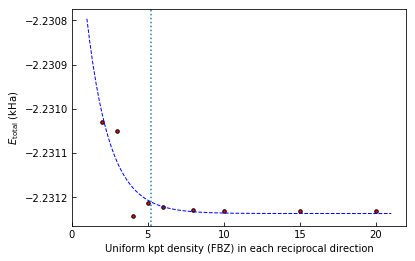

In [21]:
%matplotlib inline
Ha_to_eV = 27.211396132
margin = 7*10*10**(-3)
study_k.smooth_and_plot(margin/Ha_to_eV, x_label=r'Uniform kpt density (FBZ) in each reciprocal direction', k_x=[2,3,4,5,6,8,10,15,20])
#Note for kpt studies, since it is not clear what you provide in the x axis, you have to provide it. For ecut and pawecutdg it is not the case.

I think that with this you have all the elements to perform convergence studies. 

#### Get band-structure data

Band-structure modules require you to provide an *_EIG* file obtained from a band-structure calculation. I provided one file in <code> files/bands/sro_band_EIG</code>.

In [3]:
from abidata import Abidata
#help(Abidata)
#Initializing the data
bands = Abidata('files/bands/sro_band_EIG', type='band', fermi=7.88)

#Gathering the data
energy, kpts = bands.make()
#kpath used is [X, M, Gamma, X, Z, Gamma]

print(bands.nkpt)
print(bands.nband)

#kpath
kbounds = [[0.5, 0, -0.2500000], #X
   [0.5, 0.5, -0.5000000],       #M
   [0, 0, 0],                    #Gamma
   [0.5, 0, -0.25000000],        #X
   [1, 0, -0.5000],              #Z
   [1, 0, 1]]                    #Gamma

#Indices of boundaries
indices = []
for kpt1 in kbounds:
    for i, kpt2 in enumerate(kpts):
        if kpt1 == kpt2 and i not in indices:
            indices.append(i)
            break
print(indices)

125
34
[0, 20, 48, 68, 88, 124]


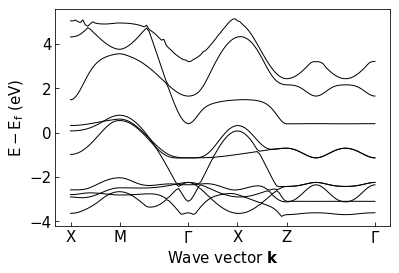

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#To find your kpts boundaries, you can just provide the list you provided in your input file
#You can search for them in kpts returned from abidata
#I always suggest you to use "ndivsm" in your input file
#You therefore won't need to focus on the distancing between the kpts :
#In other words : the xaxis can be generated with a simple range

#xlabel
kpt_axis = indices
kpt_name = ('X', 'M', r'$\Gamma$', 'X', 'Z', r'$\Gamma$')

#Plotting
#matplotlib.rcParams['figure.figsize'] = (20,15)
matplotlib.rcParams['font.size'] = 15
axes = plt.gca()

#Select your bands
plotted_bands = range(bands.nband)[-10:]
for i in plotted_bands:
    plt.plot(range(bands.nkpt), energy[:,i], 'k-', lw=1)

plt.xlabel(r'Wave vector $\mathbf{k}$')
plt.xticks(kpt_axis, kpt_name)
plt.ylabel(r'$\mathrm{E}-\mathrm{E}_{\mathrm{f}}$ (eV)')

axes.xaxis.set_tick_params(direction='in', length = 4)
axes.yaxis.set_tick_params(direction='in', length=4)

plt.show()

#### Get dos data

DOS data extraction are only possible on *_DOS* file with <code> prtdos 1 </code>, <code> prtdos 3 </code> or <code> prtdos 3 + prtdosm 1 </code> (the code will normally check if you provided a *_DOS* file with one of these variables.  

I provided one Ruthenium's projected orbitals DOS in <code> files/dos/sro_dos </code>.

In [8]:
from abidata import Abidata
import numpy as np

dos_data = Abidata('files/dos/sro_dos', type='dos')

energy, fermi, dos = dos_data.make()

#dos dictionnary keys
#"loc l", "integ l", "l m", with l,m orbitals indexing (l=0,1,2,3,4, and m in [-l,l]); integ is integrated dos while loc is local.
print(len(energy), len(dos['2 -1']))

n_l = 5
total_dos = []
for i in range(len(energy)):
    to_sum = [dos['loc '+str(j)][i] for j in range(n_l)]
    total_dos.append(np.sum(to_sum))

data_xy = dos['2 -2']
data_yz = dos['2 -1']
data_zx = dos['2 1']

7601 7601


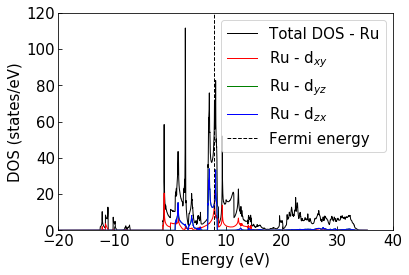

In [9]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Plotting of the local total dos and projected dos (t_2g == '2 -2', '2 -1', '2 1' == xy, yz, zx)

all_dos = [total_dos, data_xy, data_yz, data_zx]
colors = ['k-', 'r-', 'g-', 'b-']
labels = ['Total DOS - Ru', 'Ru - d$_{xy}$', 'Ru - d$_{yz}$', 'Ru - d$_{zx}$']

#Plotting
matplotlib.rcParams['font.size'] = 15
axes = plt.gca()
for i in range(4):
    plt.plot(energy, all_dos[i], colors[i], lw=1, label=labels[i])
    
plt.xlabel(r'Energy (eV)')
plt.ylabel(r'DOS (states/eV)')
plt.xlim(-20,40)
plt.ylim(0,120)
plt.axvline(x=fermi, lw=1, ls='dashed', color='k', label='Fermi energy')
plt.legend(loc=1)
axes.xaxis.set_tick_params(direction='in', length = 4)
axes.yaxis.set_tick_params(direction='in', length=4)

plt.show()

#### Fatbands

To manage fatbands calculations, since abinit's *_FATBANDS* file don't print the kpath you will have to provide 2 files : a *_FATBANDS* file and an *_EIG* file. When you make fatbands computations, an *_EIG* is always provided so this is not really a problem. Two examples of these files are provided in <code>files/fatbands</code>. We will make evidence of the crystal field splitting in this section by showing how to manage *_FATBANDS* files. 


In [5]:
from abidata import Abidata

orb = ['xy', 'yz', 'zx', 'x2y2', 'z2']
files = ['files/fatbands/sro_'+i+'_fatbands' for i in orb]

#Export the data
global_data = []
global_min = []
global_max = []
for file in files:
    global_data.append(Abidata([file, 'files/fatbands/sro_fat_EIG'], type='fat'))
for data in global_data:
    energy, data_min, data_max, kpts = data.make()
    global_min.append(data_min)
    global_max.append(data_max)

#kpath
kbounds = [[0.5, 0, -0.2500000], #X
   [0.5, 0.5, -0.5000000],       #M
   [0, 0, 0],                    #Gamma
   [0.5, 0, -0.25000000],        #X
   [1, 0, -0.5000],              #Z
   [1, 0, 1]]                    #Gamma

#Indices of boundaries
indices = []
for kpt1 in kbounds:
    for i, kpt2 in enumerate(kpts):
        if kpt1 == kpt2 and i not in indices:
            indices.append(i)
            break

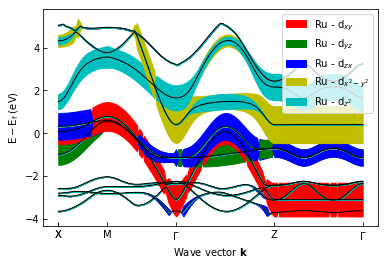

In [8]:
#Plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#xlabel
kpt_axis = indices
kpt_name = ('X', 'M', r'$\Gamma$', 'X', 'Z', r'$\Gamma$')

matplotlib.rcParams['font.size'] = 10
axes = plt.gca()

#Plotting
labels = ['$_{xy}$', '$_{yz}$', '$_{zx}$', '$_{x^2-y^2}$', '$_{z^2}$']
labels = ['Ru - d'+i for i in labels]
colors = ['r', 'g', 'b', 'y', 'c']
bands = range(global_data[0].nband)[-10:]
for i in bands:
    plt.plot(range(global_data[0].nkpt), energy[:,i], 'k-', lw=1)
    for j,data in enumerate(global_data):
        if i == min(bands):
            labelp=labels[j]
        else:
            labelp=None
        plt.fill_between(range(global_data[0].nkpt), global_min[j][:,i], global_max[j][:,i], color=colors[j],label=labelp)

plt.xlabel(r'Wave vector $\mathbf{k}$')
plt.xticks(indices, kpt_name)
plt.ylabel(r'$\mathrm{E}-\mathrm{E}_{\mathrm{f}}$ (eV)')
plt.legend(loc=1)

axes.xaxis.set_tick_params(direction='in', length = 4)
axes.yaxis.set_tick_params(direction='in', length=4)

plt.show()

#### Relaxations

After you have completed a relaxation calculation, you just have to provide the *.out* file as I did in <code>files/relax</code>. These are output files when applying uniaxial stress with spin-orbit coupling relaxations. One thing to notice : I provided two files. That is because I had some trouble during this Internship managing abinit <code> ndtset > 10 </code>; so when I was confronting this situation, I had to build different input files. Don't worry, this is implemented in <code>Abidata.make_relax</code>.

In [1]:
from abidata import Abidata

relaxs = Abidata(['files/relax/sro_relax_1.out', 'files/relax/sro_relax_2.out'], type='relax', 
                 ndata=13, name=['files/relax/data_cell', 'files/relax/data_xred'])

relaxs.make()

As you can see in <code>files/relax</code>, cell parameters and atomic positions were written. When performing relaxations, you have to go in the conventionnal cell basis. But after that, this basis is not very useful; so you must go back in the basis you want. Everything is implemented in <code>lattice.py</code>.

In [2]:
from lattice import Lattice

bravais = Lattice('files/relax/data_xred', 'files/relax/data_cell', ndt=13)

Data loaded with correct dimensions.
Be aware : only cartesian cell parameters are implemented (related to relaxations).


Oh, I forgot something. The atomic order written in abinit file was $\text{Sr}_4\text{Ru}_2\text{O}_8$ but when making projectors calculations, you should provide the order Ru-O-Sr. Let's reshape the data.

In [3]:
bravais.reshape({'Sr':[0,1,2,3], 'Ru':[4,5], 'O':[6,7,8,9,10,11,12,13]},{'Ru':[0,1], 'O':[2,3,4,5,6,7,8,9], 'Sr':[10,11,12,13]}, 
                name='files/relax/reshaped_xred')

New data written in files/relax/reshaped_xred


Now let's go back in the unit-cell to build other input files.

In [4]:
bravais = Lattice('files/relax/reshaped_xred', 'files/relax/data_cell', ndt=13)
bravais.change_basis('cartesian', 'octahedron', name='files/relax/data_xred_octahed', relax=True)

Data loaded with correct dimensions.
Be aware : only cartesian cell parameters are implemented (related to relaxations).
New data written in files/relax/data_xred_octahed


Now let's suppose we have a vanilla file where we want to write cell parameters. Changing basis require to change your primary basis vectors : for a multidataset, it can be annoying to change every single cell parameter. You can thus use <code> Lattice.make_input </code>. The vanilla file is provided in <code>files/relax/sro.in</code>.

In [5]:
bravais.make_input('files/relax/sro.in', 'multidata')

Input file updated with cell parameters and atomic datas
